# Predicting Credit Risk Using Machine Learning
## Overview
The goal is to predict using machine learning models whether a borrower will default to pay off the loan. This information is crucial for any Credit Lending company to safeguard from loss.

## Objectives
1. Understand the relationship between various features and the target variable 'y'
2. Build and evaluate atleast 3 classifier models to predict if a borrower will default to pay off the loan
3. Provide actionable insights based on model findings

## Dataset
The dataset is obtained from https://www.kaggle.com/datasets/bytadit/bank-loan-dataset-2014-2017.
The data set used for SVM is 10% random sampling of the original dataset as it is more computationally demanding

##Input Variables
Information about the columns in the dataset is available at:https://www.kaggle.com/datasets/bytadit/bank-loan-dataset-2014-2017, in dictionary.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_data = '/content/gdrive/My Drive/Practical_Application_3'
#data_dictionary = pd.read_csv('/content/gdrive/MyDrive/Capstone/dictionary.csv')


Mounted at /content/gdrive


In [ ]:
data_dictionary = pd.read_csv('/kaggle/input/bank-loan-dataset-2014-2017/loan_data/dictionary.csv')

In [3]:
data_dictionary.drop(columns='desc_indo',inplace=True)


In [4]:
data_dictionary

,feature,desc_en
0,_rec,The total amount committed by investors for th...
1,acc_now_delinq,The number of accounts on which the borrower i...
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
155,total_cu_t,Number of finance trades
156,total_il_high_credit_limit,Total installment high credit/credit limit
157,totalAcc,The total number of credit lines currently in ...
158,totalBalExMort,Total credit balance excluding mortgage


In [5]:
#data_loan = pd.read_csv('/content/gdrive/MyDrive/Capstone/loan_data/loan_data_2007_2014.csv')
#data_bank = pd.read_csv('data/loan_data_2007_2014.csv',header=None)

In [ ]:
data_loan = pd.read_csv('/kaggle/input/bank-loan-dataset-2014-2017/loan_data/loan_data_2007_2014.csv')

# Exploratory Data Analysis (EDA)

In [6]:
data_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_loan.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [8]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
data_loan.shape

(466285, 75)

In [10]:
#Finding null count in columns
data_loan.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


In [11]:
#get all columns where all records are null, those columns can be dropped
all_null_columns = data_loan.columns[data_loan.isnull().all()]
all_null_columns

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [12]:
#Drop columns with all values null
data_loan_cleaned = data_loan.drop(columns=all_null_columns)

Getting insight into the loan_status column which is the target or dependent variable

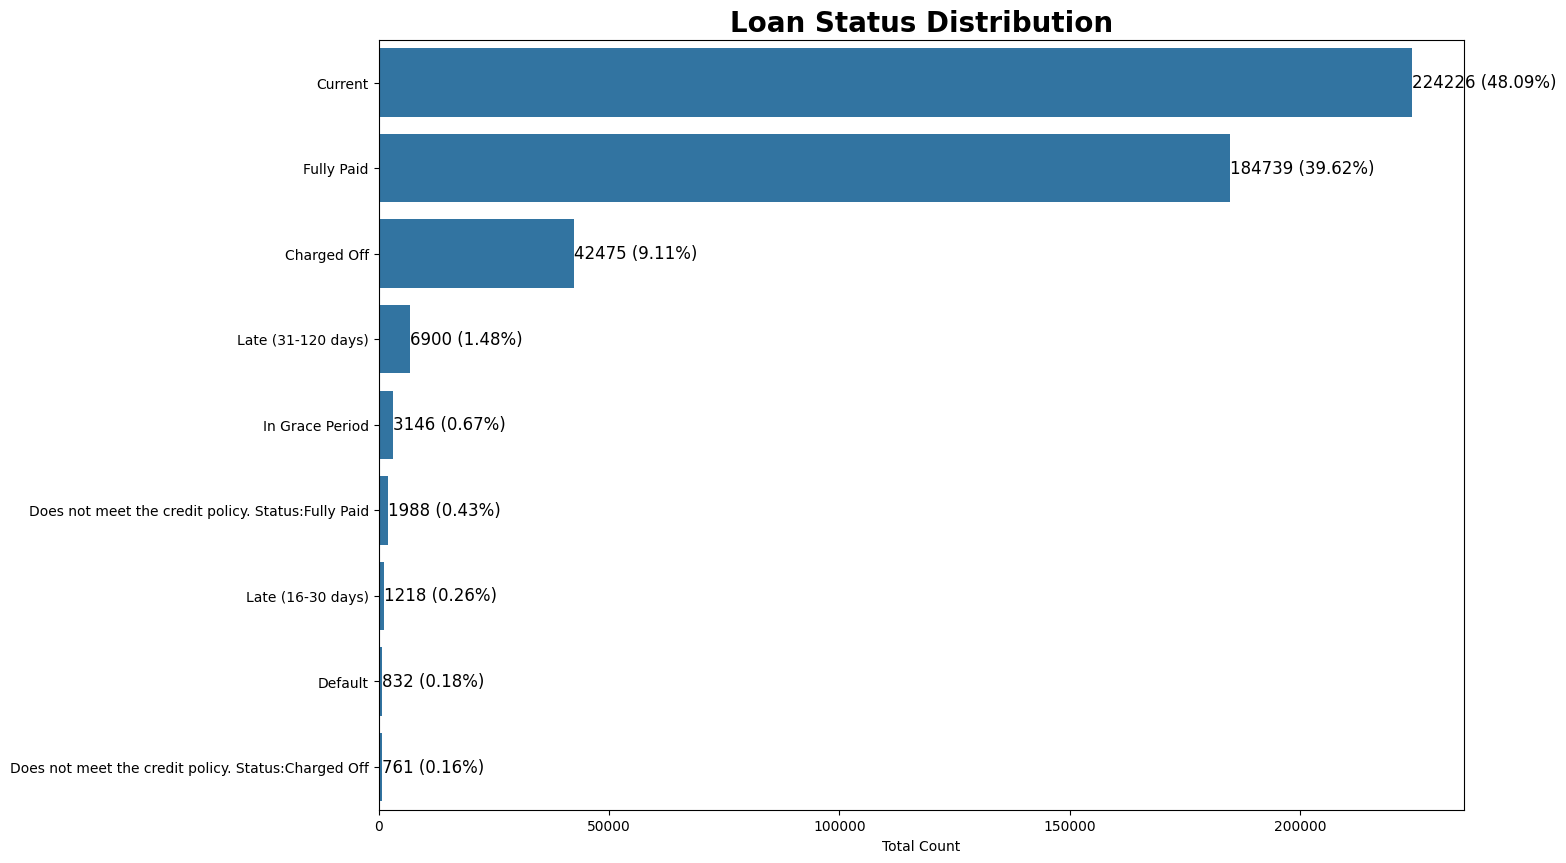

In [13]:
# Function to plot a bar plot with count and percentage annotations in descending order of percentage
def plot_bar(data_loan_cleaned, y, title, **sns_kwargs):
    # Calculate value counts and percentages
    value_counts = data_loan_cleaned[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    # Create a dataframe with total counts and percentage
    loan_stats = data_loan_cleaned.groupby(y).agg({'id':'count'}).reset_index()
    loan_stats.columns = [y, 'total']
    loan_stats['%'] = round(loan_stats['total'] * 100 / sum(loan_stats['total']), 2)

    # Sort the DataFrame by percentage in descending order
    loan_stats = loan_stats.sort_values(by='%', ascending=False)

    # Create the bar plot
    plt.figure(figsize=(14, 10))
    # Define the font style
    font = dict(size=20, weight="bold")
    plt.title(title, fontdict=font)
    sns.barplot(x=loan_stats['total'], y=loan_stats[y], **sns_kwargs)

    # Annotating each bar with total and percentage
    for i in range(len(loan_stats)):
        plt.text(loan_stats['total'].values[i], i, f"{loan_stats['total'].values[i]} ({loan_stats['%'].values[i]}%)",
                 va='center', fontdict=dict(fontsize=12))

    # Show the plot
    plt.ylabel("")
    plt.xlabel("Total Count")
    plt.show()

    # Print loan stats as a table
    #print(loan_stats)

# Call the plot function
plot_bar(data_loan_cleaned, 'loan_status', "Loan Status Distribution")

In [14]:
#data_loan_cleaned.isnull().sum()

Drop the columns which are more than 50% null

In [15]:
null_columns = data_loan_cleaned.columns[data_loan_cleaned.isnull().mean() >= 0.5]
null_columns

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog'],
      dtype='object')

In [16]:
data_loan_cleaned = data_loan_cleaned.drop(columns = null_columns)

# Feature Engineering

The target variable has to be a binary classifier meaning - will the borrower default or not default.  To get to a binary value, we need to categorize the loan_status into good/ bad/ ambiguous or neutral(cannot be determined if good or bad) and then equate the good and bad to 1 and 0 respectively

In [17]:
data_loan_cleaned['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [18]:
#Current and In Grace Period statuses are ambiguous and can go either way, default or fully paid, hence categorizing them as neutral
Neutral = ['Current','In Grace Period']
Good = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
Bad = ['Charged Off','Late (31-120 days)','Default','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off']

Creating a new column final_loan_status which will have the above 3 categories for the loan_status

In [19]:
data_loan_cleaned['final_loan_status'] = data_loan_cleaned['loan_status'].apply(lambda x: 'Neutral' if x in Neutral else ('Good' if x in Good else 'Bad'))



In [20]:
data_loan_cleaned['final_loan_status'].value_counts()

,count
final_loan_status,
Neutral,227372
Good,186727
Bad,52186


Since the category Neutral cannot help in deciding if it was a good or a bad loan, hence only considering the data for good and bad

In [21]:
data_loan_cleaned_new = data_loan_cleaned[data_loan_cleaned['final_loan_status'].isin(['Good', 'Bad'])]

Creating the binary target variable from final_loan_status

In [22]:
data_loan_cleaned_new['target'] = data_loan_cleaned_new['final_loan_status'].apply(lambda x: 1 if x == 'Good' else 0)

In [23]:
#drop columns like unnamed and member_id which has no use for analysis
data_loan_cleaned_new.drop(columns = ['Unnamed: 0', 'id', 'member_id'],axis=1,inplace=True)


In [24]:
#data_loan_cleaned_new.to_csv('/content/gdrive/MyDrive/Capstone/data_loan_cleaned_new.csv',index=False)

All columns with all null values have been dropped. ID columns have been dropped. Columns with 50% or more null values have been dropped from the data set to simplify the dataset. The a binary target variable has been created using the original loan_status column.
Now plot take a closer look at the relation between the target variable and the numeric fields.

In [25]:
#Get all the numeric columns, policy_code not needed for analysis hence dropped
numeric_columns = data_loan_cleaned_new.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop(columns=['policy_code'])
numeric_columns.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'target'],
      dtype='object')

In [26]:
correlation_matrix =  numeric_columns.corr()

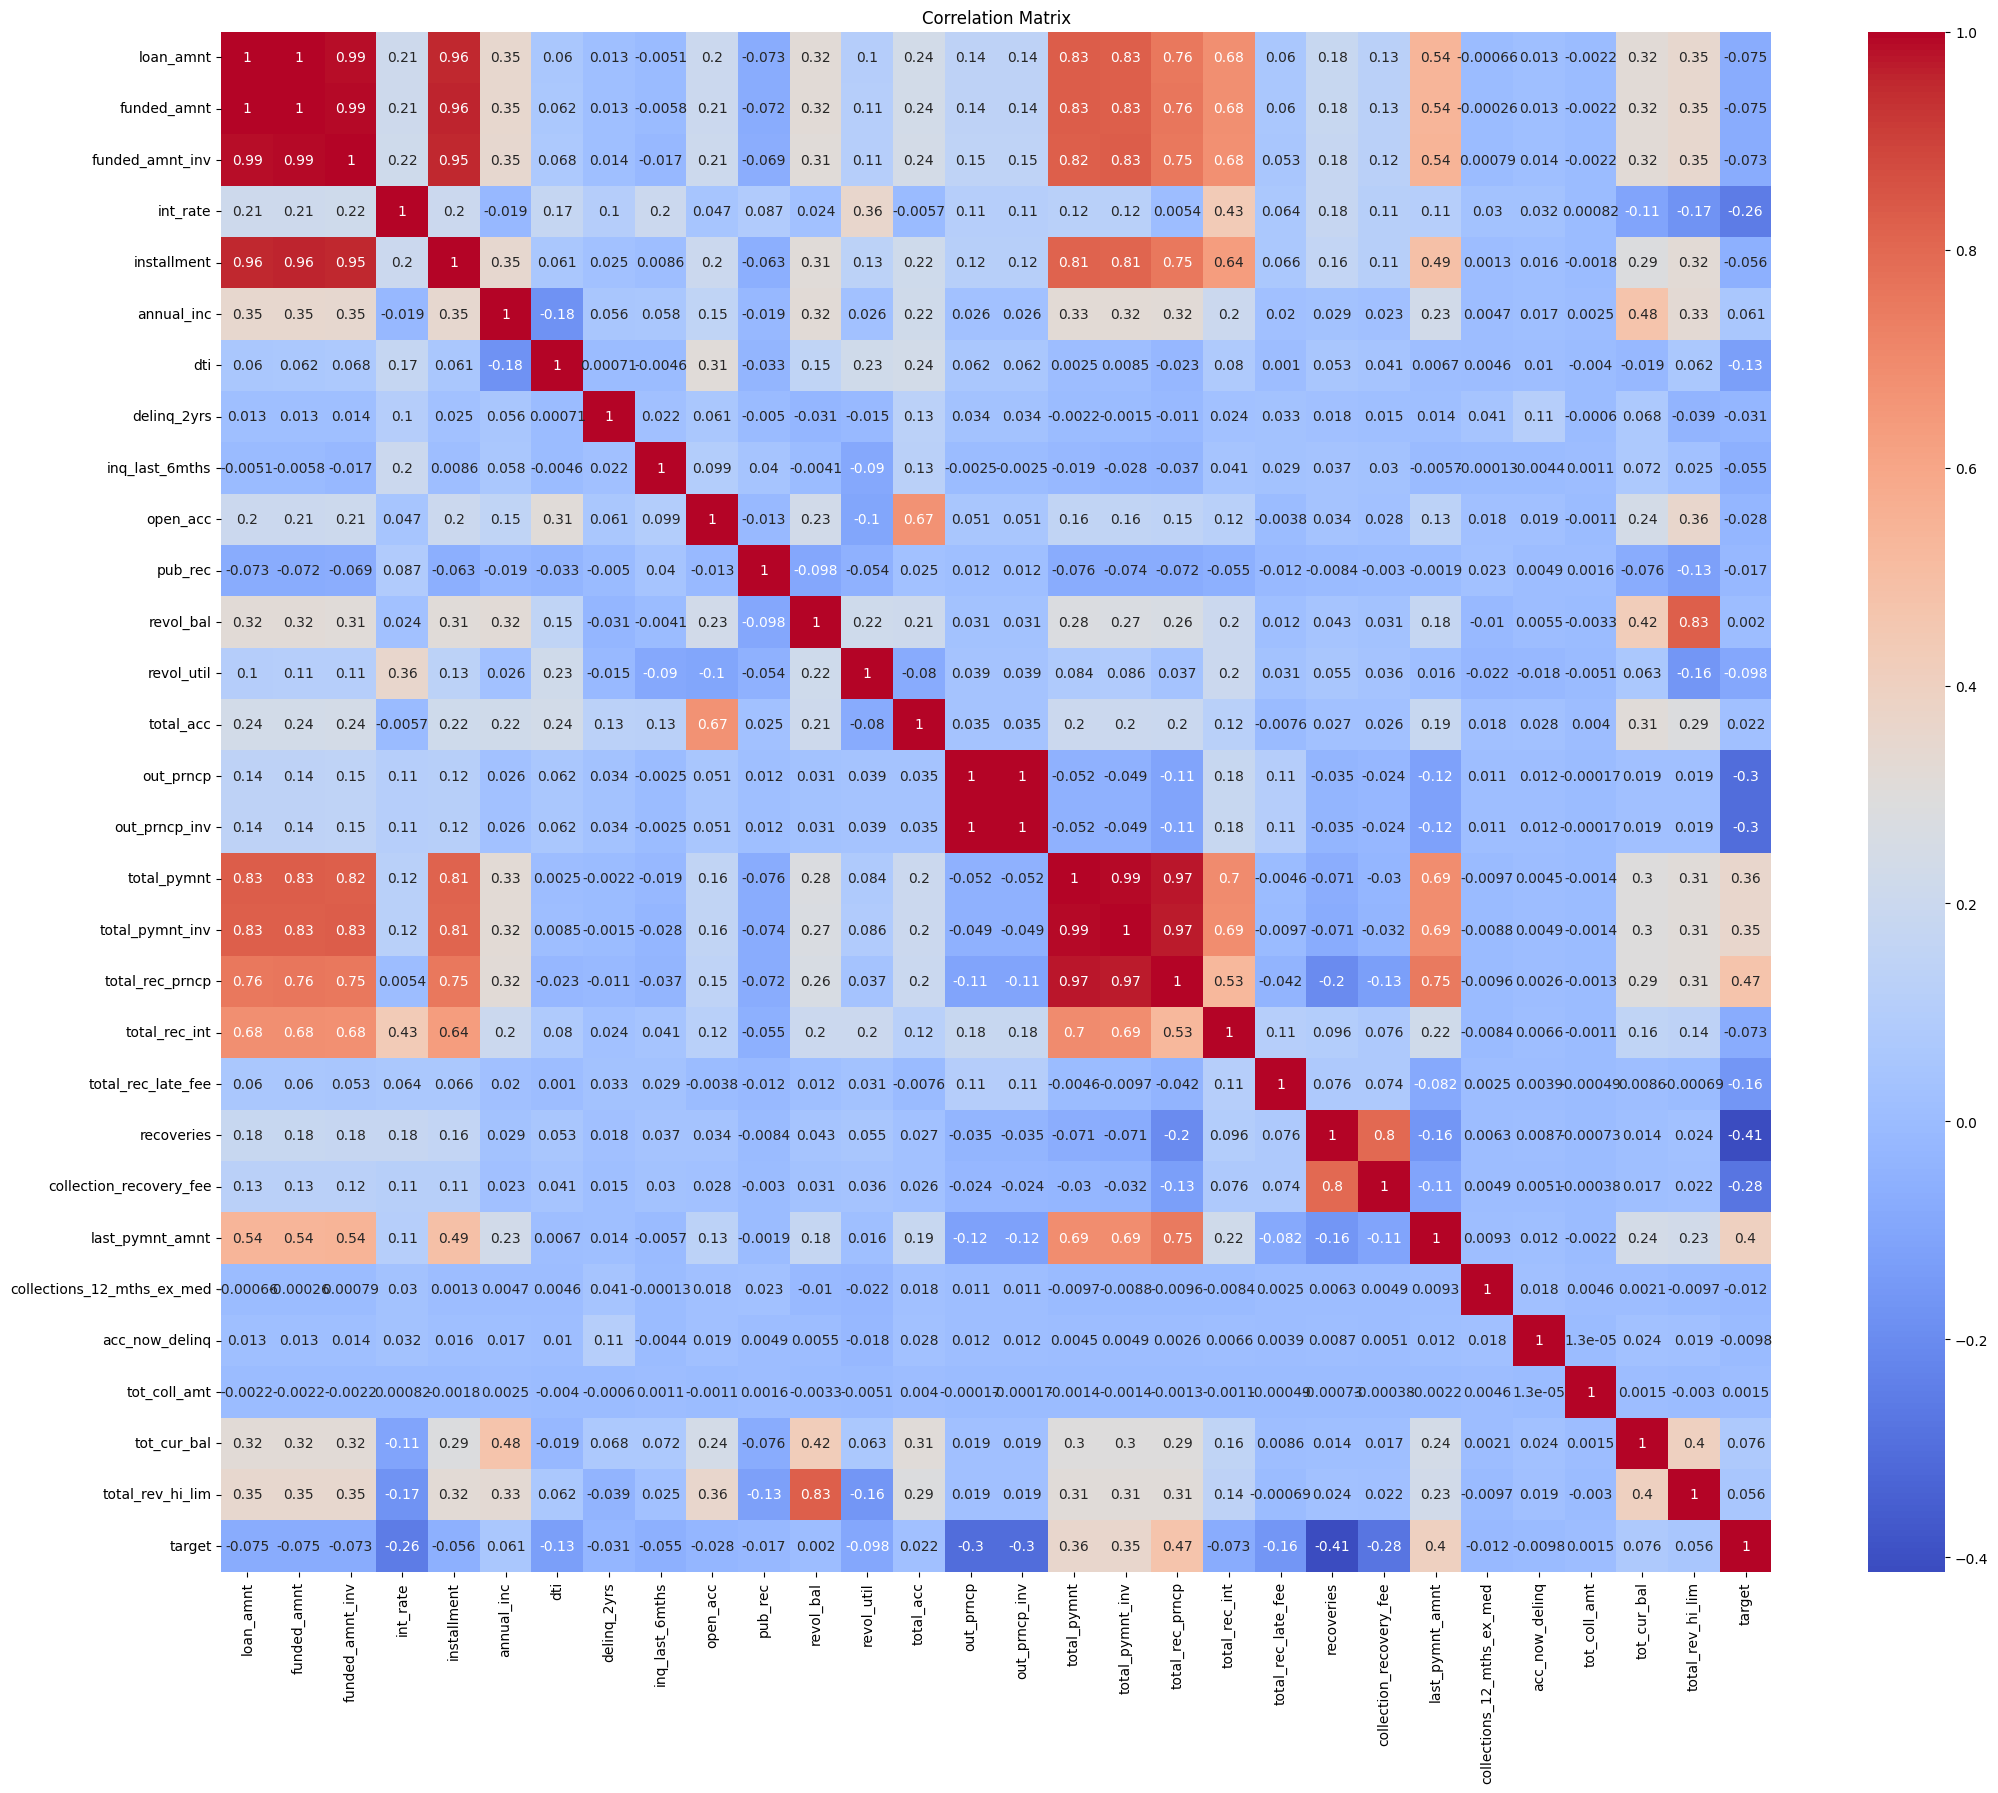

In [27]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('/content/gdrive/MyDrive/Capstone/correlation_matrix.png')
plt.show()

Since there are several numeric features, listing the correlation to the target in the descending order of the aboslute values to decide the important features

In [28]:
correlation_matrix["target"].abs().sort_values(ascending=False)

,target
target,1.000000
total_rec_prncp,0.470166
recoveries,0.413134
last_pymnt_amnt,0.401381
total_pymnt,0.358006
total_pymnt_inv,0.354663
out_prncp,0.304491
out_prncp_inv,0.304478
collection_recovery_fee,0.278468
int_rate,0.255543


In [29]:
# Finding features that have a positive corr between 0.1 and 0.99 and negetive corr between -0.99 and -0.1, and filtering out the rest. This way we are only getting the features that have moderate corr
vmin, vmax = 0.1, 0.99

#unstack the matrix from 2D to 1D
unstack_corr = correlation_matrix.unstack()
# positive correlation - this creates a boolean mask for positive correlations which fall within the vmax and vmin range
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
# negative correlation - this creates a boolean mask for negetive correlations which fall within the -vmax and -vmin range
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
# high correlation - this combines both pos_corr and neg_corr, so the resulting series is all that are within the threshold
high_corr = unstack_corr[pos_corr | neg_corr]
#This code helps identify features which have moderate correlation- defined by the threshold, and eliminates the features that do not fall within the significant threshold
trim_corr = high_corr.sort_values(ascending=False).unstack()
trim_corr

,funded_amnt_inv,loan_amnt,total_pymnt,total_rec_prncp,total_pymnt_inv,funded_amnt,installment,revol_bal,total_rev_hi_lim,recoveries,...,int_rate,revol_util,dti,inq_last_6mths,out_prncp,out_prncp_inv,delinq_2yrs,acc_now_delinq,total_rec_late_fee,pub_rec
loan_amnt,0.988854,NaN,0.829336,0.756198,0.825246,NaN,0.955487,0.318893,0.349787,0.183190,...,0.213034,0.104894,NaN,NaN,0.142202,0.142199,NaN,NaN,NaN,NaN
funded_amnt_inv,NaN,0.988854,0.824974,0.753027,0.834060,NaN,0.951128,0.310017,0.349745,0.181241,...,0.217818,0.109786,NaN,NaN,0.145261,0.145258,NaN,NaN,NaN,NaN
total_rec_prncp,0.753027,0.756198,0.973498,NaN,0.967971,0.758096,0.751797,0.263095,0.312988,-0.200447,...,NaN,NaN,NaN,NaN,-0.105003,-0.105007,NaN,NaN,NaN,NaN
total_pymnt,0.824974,0.829336,NaN,0.973498,NaN,0.830873,0.812703,0.279246,0.310413,NaN,...,0.118639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_pymnt_inv,0.834060,0.825246,NaN,0.967971,NaN,0.827314,0.808641,0.274196,0.310392,NaN,...,0.121971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.951128,0.955487,0.812703,0.751797,0.808641,0.959551,NaN,0.312439,0.324213,0.162718,...,0.202959,0.134611,NaN,NaN,0.115150,0.115152,NaN,NaN,NaN,NaN
funded_amnt,NaN,NaN,0.830873,0.758096,0.827314,NaN,0.959551,0.317831,0.349788,0.183541,...,0.214963,0.106717,NaN,NaN,0.143523,0.143520,NaN,NaN,NaN,NaN
total_rev_hi_lim,0.349745,0.349787,0.310413,0.312988,0.310392,0.349788,0.324213,0.828113,NaN,NaN,...,-0.173980,-0.159646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.125701
revol_bal,0.310017,0.318893,0.279246,0.263095,0.274196,0.317831,0.312439,NaN,0.828113,NaN,...,NaN,0.221131,0.149991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collection_recovery_fee,0.122981,0.126736,NaN,-0.129526,NaN,0.127112,0.114833,NaN,NaN,0.798515,...,0.113946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Create a mask to form the lower triangular matrix. Since the upper triangle and the lower triangle of the corr matrix have the values repeated, we only need to consider one triangle
#the below statement will pad the upper triangle with 0
mask = np.zeros_like(trim_corr)
mask[np.triu_indices_from(mask)] = True
# analyzing the high correlation from features/columns, The below statement sorts the absolute values (of both the positive and the negetive corr in the descending order)
#aff_loan = high_corr.loc["target"].abs().sort_values(ascending=False)
#aff_loan
corr_col = high_corr.loc["target"].abs().sort_values(ascending=False)
corr_col

,0
total_rec_prncp,0.470166
recoveries,0.413134
last_pymnt_amnt,0.401381
total_pymnt,0.358006
total_pymnt_inv,0.354663
out_prncp,0.304491
out_prncp_inv,0.304478
collection_recovery_fee,0.278468
int_rate,0.255543
total_rec_late_fee,0.163716


In [31]:
#Identifying highly correlated pairs
# list out the cols that are beyond the threshold, so that we can take them out of our analysis
th = 0.9

# this is getting all the columns which have very high correlation values, indicating multicollenearity
aff_coll = (high_corr.abs()
                             .loc[high_corr > th]
#                              .loc[corr_col.index, corr_col.index]
                             .sort_values(ascending=False)
)
aff_coll

,,0
loan_amnt,funded_amnt_inv,0.988854
funded_amnt_inv,loan_amnt,0.988854
total_pymnt,total_rec_prncp,0.973498
total_rec_prncp,total_pymnt,0.973498
total_pymnt_inv,total_rec_prncp,0.967971
total_rec_prncp,total_pymnt_inv,0.967971
funded_amnt,installment,0.959551
installment,funded_amnt,0.959551
loan_amnt,installment,0.955487
installment,loan_amnt,0.955487


In [32]:
#this code identifies highly correalted pairs based on the above threshold and then keeps one column from pair
#If aff_coll shows that column_A and column_B have a correlation greater than the threshold (0.9), and column_C and column_D also have a high correlation, this code ensures that:
#Either column_A or column_B is included (but not both).

left_index = aff_coll.index.get_level_values(0)
right_index = aff_coll.index.get_level_values(1)
include_cols,exclude_cols = [],[]
for left,right in zip(left_index,right_index):
  if left not in include_cols and left not in exclude_cols:
    include_cols.append(left)
  if right not in include_cols and right not in exclude_cols:
    exclude_cols.append(right)
include_cols,exclude_cols


(['loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'funded_amnt'],
 ['funded_amnt_inv', 'total_rec_prncp', 'installment'])

Now build the list of numeric columns to be included in the analysis.

In [33]:
num_cols = corr_col[~corr_col.index.isin(exclude_cols)].index.to_list()
num_cols.append('target')
num_cols

['recoveries',
 'last_pymnt_amnt',
 'total_pymnt',
 'total_pymnt_inv',
 'out_prncp',
 'out_prncp_inv',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'target']

Get all the categorical features for analysis

In [34]:
#Find all the categorical features
categorical_features = data_loan_cleaned_new.select_dtypes(include=['object'])
categorical_features.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'final_loan_status'],
      dtype='object')

In [35]:
#find the unique values for all the categorical features
for feature in categorical_features:
  print(categorical_features[feature].value_counts())


term
 36 months    186469
 60 months     52444
Name: count, dtype: int64
grade
B    72239
C    61042
A    39500
D    38715
E    18086
F     7348
G     1983
Name: count, dtype: int64
sub_grade
B3    17375
B4    16126
C1    14012
B2    13927
B5    13414
C2    13377
C3    11923
B1    11397
C4    11232
A5    11101
C5    10498
A4    10380
D1     9529
D2     8713
D3     7613
D4     7048
A3     6753
D5     5812
A2     5765
A1     5501
E1     4370
E2     4344
E3     3541
E4     3151
E5     2680
F1     2107
F2     1684
F3     1509
F4     1143
F5      905
G1      670
G2      481
G3      332
G4      259
G5      241
Name: count, dtype: int64
emp_title
Teacher                          1652
Manager                          1622
RN                                715
Supervisor                        712
Registered Nurse                  712
                                 ... 
COLDWELL BANKER                     1
the hospital of central conn        1
Powhatan County Schools             1
PhyAmerica

Observation from the unique counts of categorical features
1. Application_type - only 1 type Individual. The column can be dropped
2. Addr_state- too many unique values, while CA is max.
3. Zipcode - too many unique values, column can be dropped
4. purpose - Debt_consolitation seems to be the highest
5. url - too many unique values, can be dropped
6. Verification_status - verified and not verified count almost same
7. Home_ownership - MORTGAGE is max
8. emp_title - too many unique values, column can be dropped
9. emp_length - 10+years has the max count
10. term - 36, 60 months, 36 being more common

Seeing the distribution of each of the important categorical features against the final_loan_status

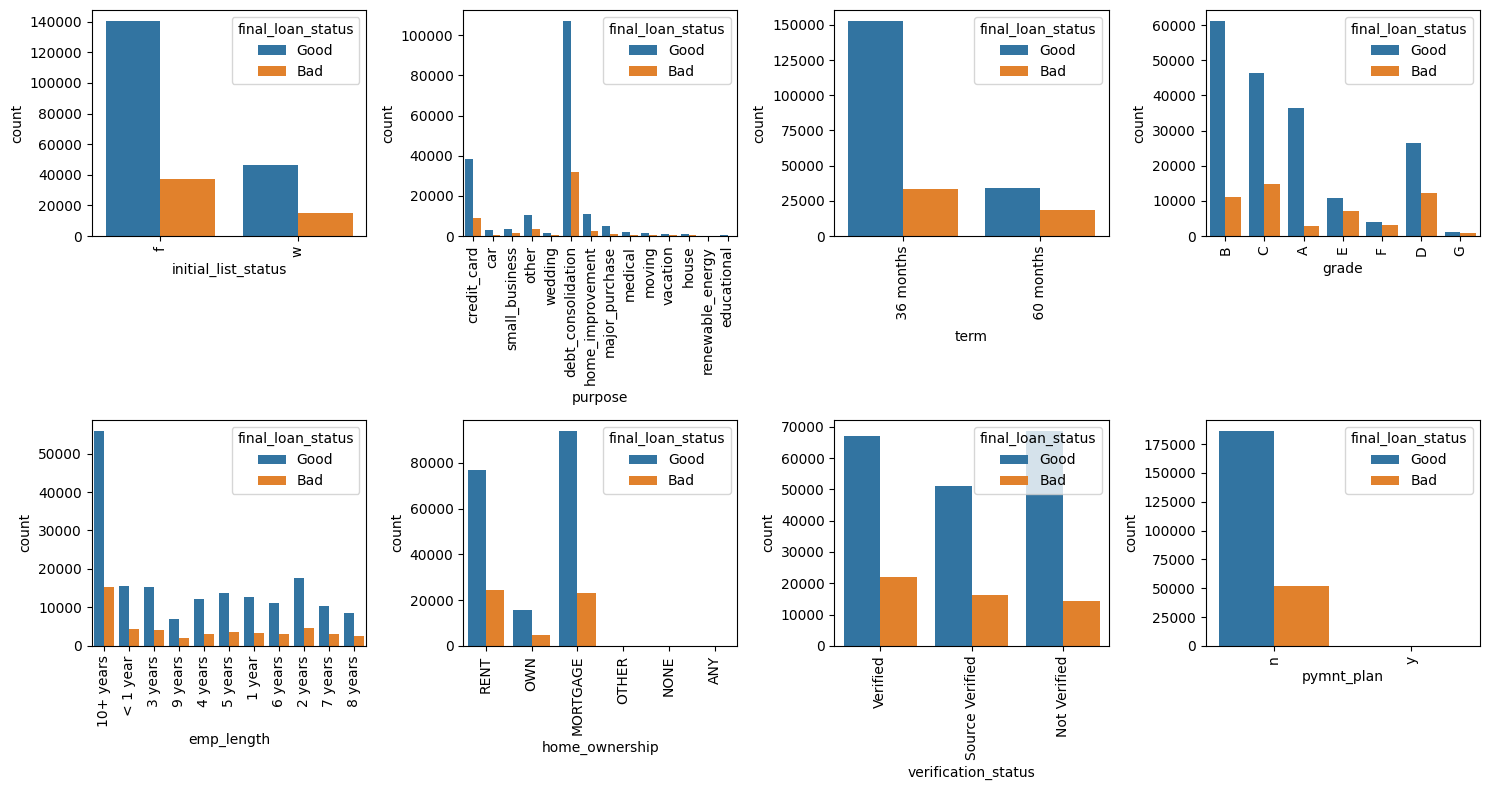

In [36]:
cat_feature_analyze = ['initial_list_status','purpose','term','grade','emp_length','home_ownership','verification_status','pymnt_plan']
#for feature in cat_feature_analyze:
#  sns.countplot(x=feature, hue=categorical_features['final_loan_status'], data=categorical_features)
#  plt.title('Relationship between Categorical Feature and Target')
#  plt.xticks(rotation=45, ha='right')
#  plt.show()

plt.figure(figsize=(15, 8))
for i in range(len(cat_feature_analyze)):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=cat_feature_analyze[i], hue='final_loan_status', data=categorical_features)
    plt.xlabel(cat_feature_analyze[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


In [37]:
data_loan_cleaned_new.shape

(238913, 53)

Dropping the categorical features with too many unique value or only 1 value

In [38]:
data_loan_cleaned_new.drop(columns=['application_type','addr_state','zip_code','url','emp_title','sub_grade'],inplace=True) #dropping these fields as there are too many unique values
#data_loan_cleaned_new.shape
data_loan_cleaned_new.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'final_loan_status'],
      dtype='object')

In [39]:
#pymnt_plan= n cnt 238906, y = 7, data is extremely imbalanced, hence dropping the column
data_loan_cleaned_new.pymnt_plan.value_counts()
data_loan_cleaned_new.drop(columns='pymnt_plan',inplace=True)

In [40]:
data_loan_cleaned_new.shape

(238913, 46)

In [41]:
# Ordering feature `emp_length`
length = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
data_loan_cleaned_new['emp_length'] = pd.Categorical(data_loan_cleaned_new['emp_length'], categories=length, ordered=True)

In [42]:
#data_loan_cleaned_new[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].head()

In [43]:
from datetime import datetime as dt
data_loan_cleaned_new['issue_d'] = pd.to_datetime(data_loan_cleaned_new['issue_d'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))
data_loan_cleaned_new['last_pymnt_d'] = pd.to_datetime(data_loan_cleaned_new['last_pymnt_d'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))
data_loan_cleaned_new['last_credit_pull_d'] = pd.to_datetime(data_loan_cleaned_new['last_credit_pull_d'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))
data_loan_cleaned_new['earliest_cr_line'] = pd.to_datetime(data_loan_cleaned_new['earliest_cr_line'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))

The code below performs correlation analysis between date columns and the target variable (final_loan_status) using the dython library

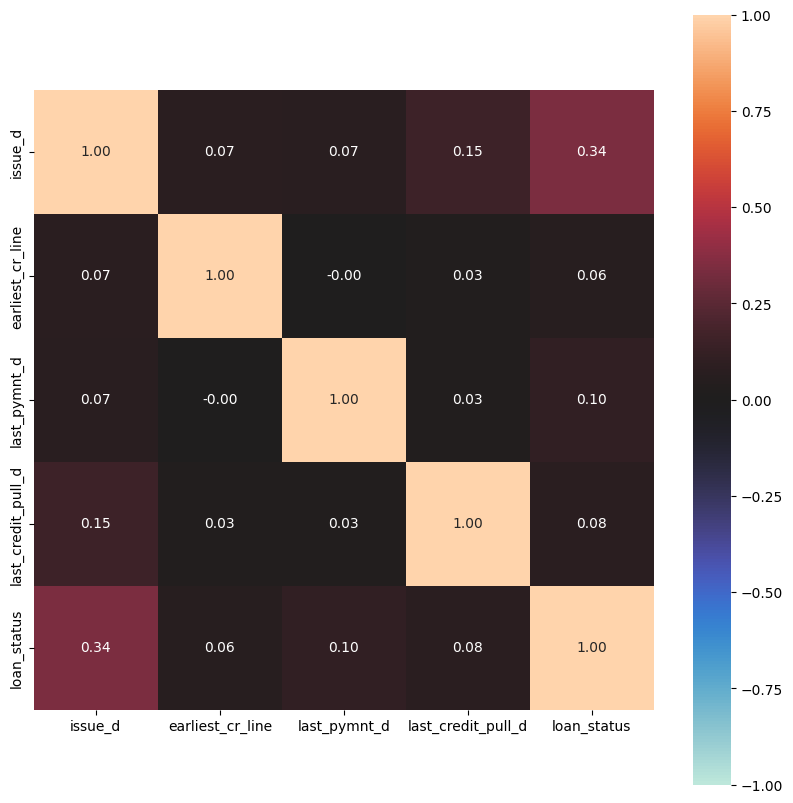

In [44]:
# Correlation between date and loan status
!pip install dython
from dython.nominal import associations
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]
# Handle missing values in date columns before calculating associations
data_loan_cleaned_new[date_cols] = data_loan_cleaned_new[date_cols].fillna(pd.Timestamp.min)  # or any appropriate default timestamp
used_cols = date_cols + ["loan_status"]
complete_correlation = associations(
    data_loan_cleaned_new[used_cols],
    filename='date_correlation.png',
    figsize=(10,10)
)

In [45]:
#There is no strong correlation between dates and each date has little correlation with loan status. Lets remove the date feature that correlates less than 0.1 with the loan status
# Date features will be used
corr_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]
corr_date_cols
# Remove date features that don't have a strong correlation with loan status
unused_cols = ["earliest_cr_line"]
data_loan_cleaned_new = data_loan_cleaned_new.drop(columns=unused_cols, errors="ignore")

In [46]:
#Reducing the number of unique values in the home_ownership column by bucketing the values with smaller counts into 1 bucket
#The 'OWN', 'NONE' and 'ANY' labels on the home_ownership feature will be combined with the 'OTHER' label
data_loan_cleaned_new['home_ownership'].value_counts()
data_loan_cleaned_new.home_ownership.replace({'NONE':'OTHER','ANY':'OTHER','OWN':'OTHER'},inplace=True)
data_loan_cleaned_new.home_ownership.unique()

array(['RENT', 'OTHER', 'MORTGAGE'], dtype=object)

In [47]:
data_loan_cleaned_new.shape

(238913, 45)

In [48]:
data_loan_cleaned_new.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'title', 'initial_list_status', 'next_pymnt_d',
       'final_loan_status'],
      dtype='object')

In [49]:
num_cols

['recoveries',
 'last_pymnt_amnt',
 'total_pymnt',
 'total_pymnt_inv',
 'out_prncp',
 'out_prncp_inv',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'target']

In [50]:
data_loan_cleaned_new['target'].isnull().sum()

0

For the numerica cols, fill null values with the mean of the column

In [51]:
data_loan_cleaned_new.fillna({
    'recoveries': data_loan_cleaned_new['recoveries'].mean(),
    'last_pymnt_amnt': data_loan_cleaned_new['last_pymnt_amnt'].mean(),
    'total_pymnt': data_loan_cleaned_new['total_pymnt'].mean(),
    'total_pymnt_inv': data_loan_cleaned_new['total_pymnt_inv'].mean(),
    'out_prncp': data_loan_cleaned_new['out_prncp'].mean(),
    'out_prncp_inv': data_loan_cleaned_new['out_prncp_inv'].mean(),
    'collection_recovery_fee': data_loan_cleaned_new['collection_recovery_fee'].mean(),
    'int_rate': data_loan_cleaned_new['int_rate'].mean(),
    'total_rec_late_fee': data_loan_cleaned_new['total_rec_late_fee'].mean(),
    'dti': data_loan_cleaned_new['dti'].mean(),

}, inplace=True)

In [52]:
data_loan_cleaned_new['recoveries'].value_counts()

,count
recoveries,
0.00,214542
14.28,9
11.70,9
200.00,9
10.00,9
...,...
423.23,1
2311.77,1
850.18,1


In [53]:
data_loan_cleaned_new[num_cols].columns

Index(['recoveries', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv',
       'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate',
       'total_rec_late_fee', 'dti', 'target'],
      dtype='object')

In [54]:
# new dataframe containing only the columns to be used for prediction

prediction_df = pd.concat([data_loan_cleaned_new[num_cols],
                           data_loan_cleaned_new[corr_date_cols],
                           data_loan_cleaned_new.select_dtypes(include=['object'])], axis=1)
#since target variable is derived from loan_status and final_status, we can drop those 2 columns
prediction_df.drop(columns=['loan_status','final_loan_status'],inplace=True)
prediction_df.shape

(238913, 22)

In [55]:
prediction_df.drop(columns='title', axis=1, inplace=True)



In [56]:
data_loan_cleaned_new['next_pymnt_d'].isnull().sum()

227214

In [57]:
#since more than 90% of the data is null for next_pymnt_d, dropping this column
prediction_df.drop(columns='next_pymnt_d', axis=1, inplace=True)

In [58]:
prediction_df.shape

(238913, 20)

In [59]:
prediction_df.columns

Index(['recoveries', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv',
       'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate',
       'total_rec_late_fee', 'dti', 'target', 'issue_d', 'last_pymnt_d',
       'last_credit_pull_d', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

In [60]:
cat_features = prediction_df.select_dtypes(include=['object']).columns
cat_features

Index(['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status'],
      dtype='object')

In [61]:
full_features = prediction_df[['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status','recoveries', 'last_pymnt_amnt', 'total_pymnt', 'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate', 'total_rec_late_fee', 'dti', 'target']]

In [62]:
full_features.shape

(238913, 16)

In [63]:
# Preprocessing pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [64]:
full_features = pd.get_dummies(full_features, drop_first=True)

In [65]:
full_features.isnull().sum()
full_features.dropna(inplace=True)

In [66]:
X = full_features.drop(columns='target')
y = full_features['target']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test

((191130, 34),
 (47783, 34),
 (191130,),
 77708     1
 433029    1
 168647    1
 179598    1
 275576    1
          ..
 247175    1
 131229    0
 15377     1
 54389     0
 249935    0
 Name: target, Length: 47783, dtype: int64)

In [69]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [70]:
# Handle non-numeric data (replace '...' with appropriate handling)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [71]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [72]:
print(y_test.isnull().sum())

0


In [73]:
#full_features.to_csv('/content/gdrive/MyDrive/Capstone/final_dataset.csv',index=False)

Baseline Modelling

In [74]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy =accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1

In [75]:
results = []
log_reg = LogisticRegression(max_iter=1000)
accuracy, precision, recall, f1 = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
results.append({'Model': 'Logistic Regression', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.955611828474562
Precision: 0.9618595128097438
Recall: 0.9820964326874112
F1 Score: 0.9718726378187701


In [86]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
accuracy, precision, recall, f1 = evaluate_model(rf, X_train, X_test, y_train, y_test)
results.append({'Model': 'Random Forest', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.97676998095557
Precision: 0.9799793163798362
Recall: 0.990485379646753
F1 Score: 0.985204340060249


In [77]:
KNN = KNeighborsClassifier()
accuracy, precision, recall, f1 = evaluate_model(KNN, X_train, X_test, y_train, y_test)
results.append({'Model': 'KNN', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9649666199275894
Precision: 0.9758325099473923
Recall: 0.9793894561925438
F1 Score: 0.9776077476658017


In [78]:
tree = DecisionTreeClassifier()
accuracy, precision, recall, f1 = evaluate_model(tree, X_train, X_test, y_train, y_test)
results.append({'Model': 'Decision Tree', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9687964338781575
Precision: 0.9811153494869177
Recall: 0.978880222990539
F1 Score: 0.979996511799509


In [79]:
# Support Vector Machine (SVM)
# Randomly select 10% of the data
from sklearn.svm import SVC
data_sampled = full_features.sample(frac=0.10, random_state=42)  # frac=0.10 means 10%
X_sampled = data_sampled.drop(columns='target')
y_sampled = data_sampled['target']
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', class_weight='balanced')
accuracy, precision, recall, f1 = evaluate_model(svm, X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled)
results.append({'Model': 'SVM', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9491525423728814
Precision: 0.97934453318645
Recall: 0.9548872180451128
F1 Score: 0.966961250849762


In [80]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9491525423728814
Precision: 0.97934453318645
Recall: 0.9548872180451128
F1 Score: 0.966961250849762


In [88]:
print(results)

[{'Model': 'Logistic Regression', 'Accuracy': 0.955611828474562, 'Precision': 0.9618595128097438, 'Recall': 0.9820964326874112, 'F1 Score': 0.9718726378187701}, {'model': 'Random Forest', 'accuracy': 0.97676998095557, 'precision': 0.9799793163798362, 'recall': 0.990485379646753, 'f1_score': 0.985204340060249}, {'Model': 'KNN', 'Accuracy': 0.9649666199275894, 'Precision': 0.9758325099473923, 'Recall': 0.9793894561925438, 'F1 Score': 0.9776077476658017}, {'Model': 'Decision Tree', 'Accuracy': 0.9687964338781575, 'Precision': 0.9811153494869177, 'Recall': 0.978880222990539, 'F1 Score': 0.979996511799509}, {'Model': 'SVM', 'Accuracy': 0.9491525423728814, 'Precision': 0.97934453318645, 'Recall': 0.9548872180451128, 'F1 Score': 0.966961250849762}, {'Model': 'Random Forest', 'Accuracy': 0.97676998095557, 'Precision': 0.9799793163798362, 'Recall': 0.990485379646753, 'F1 Score': 0.985204340060249}, {'Model': 'Random Forest', 'Accuracy': 0.97676998095557, 'Precision': 0.9799793163798362, 'Recall

In [89]:
results_df = pd.DataFrame(results)
results_df = results_df.drop_duplicates()
results_df

,Model,Accuracy,Precision,Recall,F1 Score,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.955612,0.961860,0.982096,0.971873,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Random Forest,0.97677,0.979979,0.990485,0.985204
2,KNN,0.964967,0.975833,0.979389,0.977608,NaN,NaN,NaN,NaN,NaN
3,Decision Tree,0.968796,0.981115,0.978880,0.979997,NaN,NaN,NaN,NaN,NaN
4,SVM,0.949153,0.979345,0.954887,0.966961,NaN,NaN,NaN,NaN,NaN
5,Random Forest,0.976770,0.979979,0.990485,0.985204,NaN,NaN,NaN,NaN,NaN


In [90]:
results_df.drop(index=1, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.955612,0.961860,0.982096,0.971873,NaN,NaN,NaN,NaN,NaN
2,KNN,0.964967,0.975833,0.979389,0.977608,NaN,NaN,NaN,NaN,NaN
3,Decision Tree,0.968796,0.981115,0.978880,0.979997,NaN,NaN,NaN,NaN,NaN
4,SVM,0.949153,0.979345,0.954887,0.966961,NaN,NaN,NaN,NaN,NaN
5,Random Forest,0.976770,0.979979,0.990485,0.985204,NaN,NaN,NaN,NaN,NaN


In [94]:
results_df

,Accuracy,Precision,Recall,F1 Score,model,accuracy,precision,recall,f1_score
Model,,,,,,,,,
Logistic Regression,0.955612,0.961860,0.982096,0.971873,NaN,NaN,NaN,NaN,NaN
KNN,0.964967,0.975833,0.979389,0.977608,NaN,NaN,NaN,NaN,NaN
Decision Tree,0.968796,0.981115,0.978880,0.979997,NaN,NaN,NaN,NaN,NaN
SVM,0.949153,0.979345,0.954887,0.966961,NaN,NaN,NaN,NaN,NaN
Random Forest,0.976770,0.979979,0.990485,0.985204,NaN,NaN,NaN,NaN,NaN


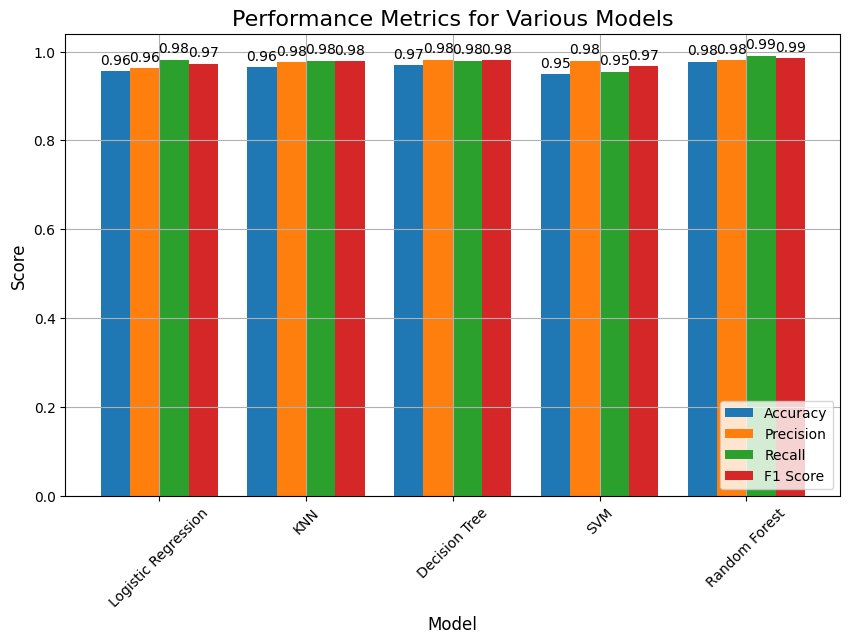

In [100]:
# Set the model as the index for easier plotting
results_df.set_index('Model', inplace=True)

# Create figure and axes for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Generate positions for each set of bars
bar_width = 0.2
index = np.arange(len(results_df))

# Plot each metric as a separate set of bars
bar1 = ax.bar(index, results_df['Accuracy'], bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, results_df['Precision'], bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, results_df['Recall'], bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, results_df['F1 Score'], bar_width, label='F1 Score')

# Add title and labels
ax.set_title('Performance Metrics for Various Models', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(index + 1.5 * bar_width)  # Adjust x-axis tick positions
ax.set_xticklabels(results_df.index, rotation=45)

# Annotate each bar with the corresponding value
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset annotation above the bar
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Add legend
ax.legend(loc='lower right')

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
#import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import LabelEncoder
##from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
#file_path = '/mnt/data/final_dataset.csv'
#data = pd.read_csv(file_path)

# Check for missing values
#data.dropna(inplace=True)

# Encode categorical columns to numeric using LabelEncoder
#label_encoders = {}
#for column in data.select_dtypes(include=['object']).columns:
#    label_encoders[column] = LabelEncoder()
#    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features and target
#X = data.drop(columns=['loan_status'])  # Assuming 'loan_status' is the target column
#y = data['loan_status']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate the model
#def evaluate_model(model, X_test, y_test):
#    y_pred = model.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
#    precision = precision_score(y_test, y_pred, average='weighted')
#    recall = recall_score(y_test, y_pred, average='weighted')
#    f1 = f1_score(y_test, y_pred, average='weighted')
#    return accuracy, precision, recall, f1

# Initialize models
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
svm = SVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
knn = KNeighborsClassifier()

# Parameter grids for GridSearchCV
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV for each model
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit models using GridSearchCV
grid_log_reg.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svm.fit(X_train_sampled, y_train_sampled)
grid_dt.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

# Get best estimators
best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_
best_svm = grid_svm.best_estimator_
best_dt = grid_dt.best_estimator_
best_knn = grid_knn.best_estimator_

# Evaluate the best models
log_reg_metrics = evaluate_model(best_log_reg, X_test, y_test)
rf_metrics = evaluate_model(best_rf, X_test, y_test)
svm_metrics = evaluate_model(best_svm, X_test_sampled, y_test_sampled)
dt_metrics = evaluate_model(best_dt, X_test, y_test)
knn_metrics = evaluate_model(best_knn, X_test, y_test)

# Display the results
gridsearch_results_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'KNN'],
    'accuracy': [log_reg_metrics[0], rf_metrics[0], svm_metrics[0], dt_metrics[0], knn_metrics[0]],
    'precision': [log_reg_metrics[1], rf_metrics[1], svm_metrics[1], dt_metrics[1], knn_metrics[1]],
    'recall': [log_reg_metrics[2], rf_metrics[2], svm_metrics[2], dt_metrics[2], knn_metrics[2]],
    'f1_score': [log_reg_metrics[3], rf_metrics[3], svm_metrics[3], dt_metrics[3], knn_metrics[3]]
})

print(gridsearch_results_df)
